<img src="../imgs/NonSupervised.png" style="width:1700px;">



# <center> 11. Non Supervised Learning: K-Means Algorithm! </center>


## <span style="color:red"> What do you do when your dataset doesn’t have any labels?</span>: 

Unsupervised learning is where you only have input data $\mathbf{X}$ and no corresponding output variables $\mathbf{y}$. The main **goal** for unsupervised learning is **to model the underlying structure*** or distribution in the data in order to learn more about the data.


- There is no correct answers and **there is no teacher**
- The goal is to dicover interesting structure **(patterns)** in the data.
- useful for
    - Big Data: Take representative samples of a lot of data
    - It is necessary focus on understanding customers
    - To find patterns in dynamic twitter
    - To find playlist music data



## <span style="color:orange"> 2. student</span>: 

For instance, how to group these data?. Try with goups of $K=1,2,3,4$

<img src="../imgs/Uncluster-student.png" style="width:400px;">


## Clustering and K-means algorithm

The idea is to **discover** inherent groups in data and to recover **centroid or representative** samples.
    - Groups or clusters are set of data that share **similar** features
    - For instance find customer patterns,  such as people that buy X also tend to buy Y


**How to cluster automatically?**

R:/ The problem is computationally difficult (NP-hard)

## K-means  O(n)

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares


- **clustering your data points into a number (K) of mutually exclusive clusters.**

<img src="../imgs/kmeans.gif" style="width:300px;">

-**How it works ?**


1. Initialize $K$ centroids $C = \{c_1, c_2, \ldots c_k\}$
    - The center points are vectors of the same length $c_i \in \mathbb{R}^{F}$
2. Each data point is classified by computing the distance between that point and each group center
    - $\arg \min_{c_i \in C} dist(c_i, x)^{2}$
3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
    -$c_i = \frac{1}{|c_i|}\sum_{x_i \in c_i} x_i$

4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. 


**Go to te action ...**


In [1]:
from sklearn.datasets import *
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [2]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0)

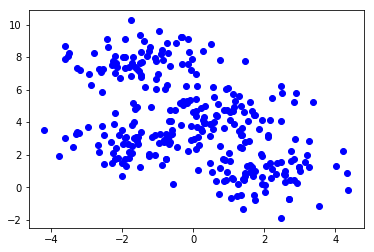

In [3]:
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow'); 

In [4]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

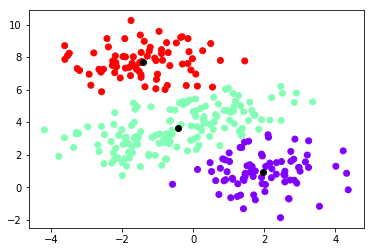

In [5]:
#print(kmeans.cluster_centers_)  
#print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  

however...some of the times the k-means can **fail**

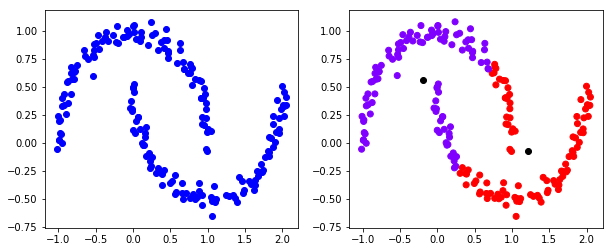

In [6]:
X,y = make_moons(200, noise=0.05)
kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)  

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

### Some Disadvantajes

- The K is imposed (some empirical strategies are proposed as elbow (codo) aproach) [5]
- the start from random choices yield different cluster results


## DBSCAN  $O(n^2)$
### Density-Based Spatial Clustering of Applications with Noise

It is a  density-based algorithm, in which **clusters** are set of points with **high density**. A point belongs to a cluster if it is near of neighboorhood grouped points (*del montón*). The DBSCAN find find arbitrarily sized and arbitrarily shaped clusters. DBSCAN is also able to find outlier points and label as noise.  
 
<img src="../imgs/DBScan.gif" style="width:450px;">

[Visualizing DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)


-**How it works ?**
1. Define: 
    - **ε>0 :** distance to be considered a point as part of a neighborhood
    - **$c_i \geq$ minpoints :** number of point minimum to be considered as a cluster. 
2. Starts with an arbitrary non-viseted point. The neighborhood points are defined as point with a distance less or equal to a ε. Points are labelled as *visited*
    - If neighborhood is larger than **minPoints** then the group is a **cluster**
    - Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster).

3. This procedure is repeated for all of the new points that have been just added to the cluster group.

4. This process of steps 2 and 3 is repeated until all points within the ε neighborhood of the cluster have been visited and labelled.

5. A new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. 


**Go to the action **

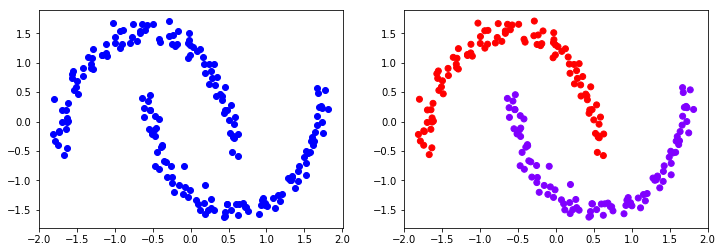

In [7]:
from sklearn.preprocessing import StandardScaler

X,y = make_moons(200, noise=0.05) 
X = StandardScaler().fit_transform(X) #mean zero and variance one

DBS = DBSCAN(eps=.3)
DBS.fit(X) 

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,1], c=DBS.labels_, cmap='rainbow');

### Some Disadvantajes of DBSCAN

- Asumme similar densities on all clusters.
- Could exist some limitation to separate clusters.

## shopping trends

- Annual Income (in thousands of dollars) 
- Spending Score (1-100) signifies how often a person spends money in a mall being the highest spender [6]. 

In [10]:
import pandas as pd  
customer_data = pd.read_csv('../data/shopping_data.csv')  
print customer_data.shape  
customer_data.head(3)

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [11]:
data = customer_data.iloc[:, 3:5].values  
data.shape

(200, 2)

## <span style="color:orange"> 3. student</span>: 

- What about use other features for clustering?  
- How genre and age are correlated?

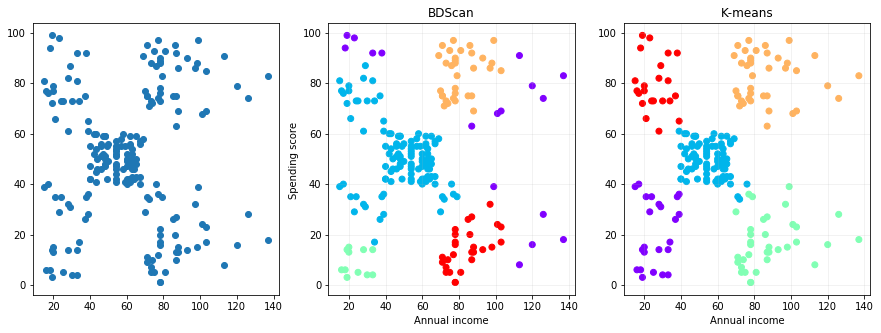

In [12]:

kmeans = KMeans(n_clusters=5)  
kmeans.fit(data)  

DBS = DBSCAN(eps=10)
#AgglomerativeClustering(n_clusters=2, linkage= "ward")
DBS.fit(data) 
plt.figure(figsize=(15, 5))  
plt.subplot(131)
plt.scatter(data[:,0], data[:,1], cmap='rainbow') 
plt.subplot(132)
plt.title("BDScan")
plt.xlabel("Annual income")
plt.ylabel("Spending score ")
plt.grid(alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')  
plt.subplot(133)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel("Annual income")
plt.title("K-means")
plt.grid(alpha=0.2)

In [ ]:
# challenge yourself

## <span style="color:orange"> 3. student</span>: 

- What about apply cluster an image?  
- Try in the next images

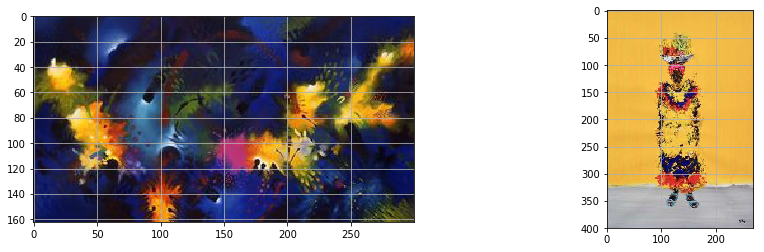

In [11]:
from skimage import io
fig = plt.figure(figsize=(9,9))
img_1 = io.imread("../imgs/jacanamijoy.jpg")
img_2 = io.imread("../imgs/juanCabas.jpg")


plt.figure(figsize=(15,4))
plt.subplot(121);
plt.imshow(img_1, cmap = plt.cm.Greys_r), plt.grid();
plt.subplot(122)
plt.imshow(img_2, cmap = plt.cm.Greys_r), plt.grid();

In [ ]:
# challenge yourself

## <span style="color:orange"> 3. student</span>: 

- What about normalize data?  
- what about introduce (x, y) as features?

In [ ]:
# challenge yourself

## Many option with different performances....
   ... So, as  **scientific of data**, please select the best in your application! [4]
<img src="../imgs/comparison.png" style="width:700px;">

<span style="font-size:larger;"> *Yan Lecun, director of AI research, explains that unsupervised learning — teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true” AI.*[3] </span>

## References

[1] Scikit-learn for kmeans: http://scikit-learn.org/stable/modules/clustering.html#k-means

[2]Introduction to Unsupervised lerning: https://blog.algorithmia.com/introduction-to-unsupervised-learning/

[3] Data Science: https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03

[4] Sklearn comparison: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

[5] K-means by hand: https://mubaris.com/posts/kmeans-clustering

[6] dataset: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

---
# <center> Thanks! </center>